# Vanilla RNN from Scratch for Vehicle Sensor Data

This notebook implements a vanilla RNN from scratch using only NumPy to process vehicle sensor data.


In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load vehicle sensor dataset
dataset_path = 'dataset/2017-07-31_Seat_Leon_RT_KA_Normal.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Dataset shape: (57331, 11)

Column names:
['Time', 'Engine Coolant Temperature [Â°C]', 'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]', 'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]', 'Air Flow Rate from Mass Flow Sensor [g/s]', 'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]', 'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]']

First few rows:


,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,07:28:41.017,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07:28:41.107,25,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07:28:41.168,25,98.0,869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07:28:41.258,25,98.0,869.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,07:28:41.348,25,98.0,869.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Explore the dataset structure
print("Dataset Info:")
print(df.info())

print("\n" + "="*50)
print("Basic Statistics:")
print(df.describe())

print("\n" + "="*50)
print("Check for missing values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing values: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

print("\n" + "="*50)
print("Data types:")
print(df.dtypes)

print("\n" + "="*50)
print("Dataset Memory Usage:")
print(f"Total memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57331 entries, 0 to 57330
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time                                       57331 non-null  object 
 1   Engine Coolant Temperature [Â°C]           57331 non-null  int64  
 2   Intake Manifold Absolute Pressure [kPa]    57330 non-null  float64
 3   Engine RPM [RPM]                           57329 non-null  float64
 4   Vehicle Speed Sensor [km/h]                57328 non-null  float64
 5   Intake Air Temperature [Â°C]               57327 non-null  float64
 6   Air Flow Rate from Mass Flow Sensor [g/s]  57326 non-null  float64
 7   Absolute Throttle Position [%]             57325 non-null  float64
 8   Ambient Air Temperature [Â°C]              57324 non-null  float64
 9   Accelerator Pedal Position D [%]           57323 non-null  float64
 10  Accelera

In [6]:
# Select only Time, RPM, and Vehicle Speed Sensor
# Create a new table with just these two sensors along with Time
sensor_df = df[['Time', 'Engine RPM [RPM]', 'Vehicle Speed Sensor [km/h]']].copy()

# Rename columns for easier working
sensor_df.columns = ['Time', 'RPM', 'Vehicle_Speed_kmh']

# Remove rows with NaN values - keep only rows where both RPM and Vehicle_Speed_kmh have values
print(f"Original shape before removing NaN: {sensor_df.shape}")
sensor_df = sensor_df.dropna()
print(f"New shape after removing NaN: {sensor_df.shape}")
print(f"Rows removed: {57331 - len(sensor_df)}")

print("\n" + "="*50)
print("New table with Time, RPM, and Vehicle Speed Sensor (no NaN values):")
print(f"Shape: {sensor_df.shape}")
print(f"\nColumn names: {sensor_df.columns.tolist()}")
print("\nFirst 10 rows:")
print(sensor_df.head(10))

print("\n" + "="*50)
print("Basic Statistics:")
print(sensor_df.describe())

print("\n" + "="*50)
print("Missing values check:")
print(sensor_df.isnull().sum())


Original shape before removing NaN: (57331, 3)
New shape after removing NaN: (57328, 3)
Rows removed: 3

New table with Time, RPM, and Vehicle Speed Sensor (no NaN values):
Shape: (57328, 3)

Column names: ['Time', 'RPM', 'Vehicle_Speed_kmh']

First 10 rows:
            Time    RPM  Vehicle_Speed_kmh
3   07:28:41.258  869.0                0.0
4   07:28:41.348  869.0                0.0
5   07:28:41.439  869.0                0.0
6   07:28:41.528  869.0                0.0
7   07:28:41.618  869.0                0.0
8   07:28:41.708  869.0                0.0
9   07:28:41.769  869.0                0.0
10  07:28:41.858  869.0                0.0
11  07:28:41.920  869.0                0.0
12  07:28:42.008  870.0                0.0

Basic Statistics:
                RPM  Vehicle_Speed_kmh
count  57328.000000       57328.000000
mean    1617.094352          75.471148
std      611.121034          51.481013
min        0.000000           0.000000
25%     1261.000000          27.000000
50%     1643.00

In [7]:
# Check if timestamps are repeating/duplicate
print("Timestamp Duplicate Check:")
print("="*50)

total_rows = len(sensor_df)
unique_timestamps = sensor_df['Time'].nunique()
duplicate_count = total_rows - unique_timestamps

print(f"Total rows: {total_rows}")
print(f"Unique timestamps: {unique_timestamps}")
print(f"Duplicate timestamps: {duplicate_count}")

if duplicate_count > 0:
    print(f"\n⚠️ WARNING: Found {duplicate_count} duplicate timestamps!")
    print("\nShowing duplicate timestamps:")
    duplicate_times = sensor_df[sensor_df.duplicated(subset=['Time'], keep=False)]
    print(f"Number of rows with duplicate timestamps: {len(duplicate_times)}")
    print("\nFirst few duplicate timestamps:")
    print(duplicate_times.head(10))
    
    print("\nDuplicate timestamp counts (top 10):")
    timestamp_counts = sensor_df['Time'].value_counts()
    duplicates = timestamp_counts[timestamp_counts > 1]
    print(duplicates.head(10))
else:
    print("\n✓ No duplicate timestamps found. All timestamps are unique!")


Timestamp Duplicate Check:
Total rows: 57328
Unique timestamps: 57328
Duplicate timestamps: 0

✓ No duplicate timestamps found. All timestamps are unique!


## Dataset Summary

**Type:** Multivariate Time Series  
**Shape:** 57,328 timesteps × 2 features  
**Features:** RPM and Vehicle Speed  
**Timestamps:** Unique (no duplicates)  
**Missing values:** None (cleaned)

This dataset will be used to understand vanilla RNN implementation from scratch using NumPy.


In [8]:
# Normalize the sensor data
# ============================================
# WHY NORMALIZATION?
# ============================================
# 1. Different scales: RPM ranges from 0-3333, while Vehicle Speed ranges from 0-198
#    Without normalization, features with larger values dominate the learning process
# 2. Gradient stability: Neural networks (including RNNs) work better when all features
#    are on a similar scale. This prevents gradients from being too large/small for some features
# 3. Faster convergence: Normalized data helps the optimization algorithm converge faster
# 4. Numerical stability: Prevents numerical overflow/underflow during computations
#
# We'll use Min-Max normalization to scale values between 0 and 1:
# normalized_value = (value - min) / (max - min)
# ============================================

# Extract the sensor columns (excluding Time)
features = sensor_df[['RPM', 'Vehicle_Speed_kmh']].values

# Calculate min and max for each feature (column-wise)
# We'll store these so we can denormalize later if needed
feature_min = features.min(axis=0)  # Min for each feature: [RPM_min, Speed_min]
feature_max = features.max(axis=0)  # Max for each feature: [RPM_max, Speed_max]

print("Original feature ranges:")
print(f"RPM: [{feature_min[0]:.2f}, {feature_max[0]:.2f}]")
print(f"Vehicle Speed: [{feature_min[1]:.2f}, {feature_max[1]:.2f}]")

# Apply Min-Max normalization: (x - min) / (max - min)
normalized_features = (features - feature_min) / (feature_max - feature_min)

print("\n" + "="*50)
print("After normalization:")
print(f"Normalized RPM range: [{normalized_features[:, 0].min():.4f}, {normalized_features[:, 0].max():.4f}]")
print(f"Normalized Vehicle Speed range: [{normalized_features[:, 1].min():.4f}, {normalized_features[:, 1].max():.4f}]")

# Create a new dataframe with normalized values (keeping Time column)
sensor_df_normalized = sensor_df.copy()
sensor_df_normalized[['RPM', 'Vehicle_Speed_kmh']] = normalized_features

print("\n" + "="*50)
print("First 10 rows of normalized data:")
print(sensor_df_normalized.head(10))

# Store min/max for later use (to denormalize predictions if needed)
print("\n" + "="*50)
print("Saved normalization parameters:")
print(f"Feature min: {feature_min}")
print(f"Feature max: {feature_max}")


Original feature ranges:
RPM: [0.00, 3333.00]
Vehicle Speed: [0.00, 198.00]

After normalization:
Normalized RPM range: [0.0000, 1.0000]
Normalized Vehicle Speed range: [0.0000, 1.0000]

First 10 rows of normalized data:
            Time       RPM  Vehicle_Speed_kmh
3   07:28:41.258  0.260726                0.0
4   07:28:41.348  0.260726                0.0
5   07:28:41.439  0.260726                0.0
6   07:28:41.528  0.260726                0.0
7   07:28:41.618  0.260726                0.0
8   07:28:41.708  0.260726                0.0
9   07:28:41.769  0.260726                0.0
10  07:28:41.858  0.260726                0.0
11  07:28:41.920  0.260726                0.0
12  07:28:42.008  0.261026                0.0

Saved normalization parameters:
Feature min: [0. 0.]
Feature max: [3333.  198.]


In [9]:
# Split data into Train, Validation, and Test sets
# ============================================
# WHY SEQUENTIAL SPLIT (not random)?
# ============================================
# For time series data, we MUST split sequentially (chronologically), not randomly:
# 1. Prevents data leakage: Future data shouldn't influence past predictions
# 2. Realistic evaluation: Test on unseen future data (like real-world scenarios)
# 3. Preserves temporal order: RNNs learn temporal patterns, so maintaining order is crucial
# 4. No random shuffle: Random splits would mix past and future, breaking time dependencies
#
# Standard split ratios for time series:
# - Training: ~70% (to learn patterns)
# - Validation: ~15% (to tune hyperparameters)
# - Test: ~15% (to evaluate final performance)
# ============================================

# Extract normalized features (excluding Time column)
# We'll work with numpy arrays for easier indexing
data = sensor_df_normalized[['RPM', 'Vehicle_Speed_kmh']].values
total_samples = len(data)

print(f"Total samples: {total_samples}")

# Define split ratios
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

# Calculate split indices
train_end = int(total_samples * train_ratio)
val_end = int(total_samples * (train_ratio + val_ratio))

# Perform sequential split
train_data = data[:train_end]
val_data = data[train_end:val_end]
test_data = data[val_end:]

print("\n" + "="*50)
print("Data Split Summary:")
print(f"Training set:   {len(train_data):,} samples ({len(train_data)/total_samples*100:.1f}%)")
print(f"Validation set: {len(val_data):,} samples ({len(val_data)/total_samples*100:.1f}%)")
print(f"Test set:       {len(test_data):,} samples ({len(test_data)/total_samples*100:.1f}%)")

print("\n" + "="*50)
print("Split indices:")
print(f"Train:   [0, {train_end})")
print(f"Val:     [{train_end}, {val_end})")
print(f"Test:    [{val_end}, {total_samples})")

print("\n" + "="*50)
print("Shape of each split:")
print(f"Train data shape:   {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape:     {test_data.shape}")

print("\n" + "="*50)
print("First few samples from each split:")
print("Training set (first 5):")
print(train_data[:5])
print("\nValidation set (first 5):")
print(val_data[:5])
print("\nTest set (first 5):")
print(test_data[:5])


Total samples: 57328

Data Split Summary:
Training set:   40,129 samples (70.0%)
Validation set: 8,599 samples (15.0%)
Test set:       8,600 samples (15.0%)

Split indices:
Train:   [0, 40129)
Val:     [40129, 48728)
Test:    [48728, 57328)

Shape of each split:
Train data shape:   (40129, 2)
Validation data shape: (8599, 2)
Test data shape:     (8600, 2)

First few samples from each split:
Training set (first 5):
[[0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]]

Validation set (first 5):
[[0.74377438 0.73737374]
 [0.74377438 0.74242424]
 [0.74377438 0.74242424]
 [0.74377438 0.74242424]
 [0.74377438 0.74242424]]

Test set (first 5):
[[0.41584158 0.27272727]
 [0.4110411  0.27272727]
 [0.4110411  0.26767677]
 [0.4110411  0.26767677]
 [0.4110411  0.26767677]]


In [11]:
# Create Sequences/Windows for RNN
# ============================================
# WHY DO WE NEED SEQUENCES?
# ============================================
# RNNs process sequences, not single data points:
# 1. Temporal patterns: RNNs learn patterns across time by processing sequences
# 2. Context: Each prediction uses previous timesteps as context
# 3. Sequential processing: RNNs process one timestep at a time within a sequence
# 4. Memory: Hidden states carry information from past timesteps
#
# Our setup:
# - Window size: 10 timesteps (input sequence length)
# - Prediction: 1 timestep ahead (next timestep)
# - Features: 2 (RPM and Vehicle Speed)
# - Input shape: (sequence_length, num_features) = (10, 2)
# - Output shape: (num_features,) = (2,) - next timestep values
#
# FORMULA FOR NUMBER OF SEQUENCES:
# ============================================
# If we have N total data points and sequence_length = L:
#   num_sequences = N - L
#
# Explanation:
# - We need L timesteps for input + 1 timestep for target
# - Starting index can be: 0, 1, 2, ..., (N-L-1)
# - Last sequence uses indices (N-L-1) to (N-2) for input, predicts index (N-1)
# - Total sequences: (N-L-1) - 0 + 1 = N - L
#
# Example:
# - N = 100 data points, L = 10
# - num_sequences = 100 - 10 = 90 sequences
# - Sequence 0: indices [0-9] → predicts [10]
# - Sequence 89: indices [89-98] → predicts [99]
# ============================================

def create_sequences(data, sequence_length=10):
    """
    Create sliding window sequences from time series data.
    
    Args:
        data: numpy array of shape (num_samples, num_features)
        sequence_length: number of timesteps to use as input (window size)
    
    Returns:
        X: input sequences of shape (num_sequences, sequence_length, num_features)
        y: target values of shape (num_sequences, num_features)
    """
    X, y = [], []
    
    # For each possible starting point
    for i in range(len(data) - sequence_length):
        # Input: sequence_length consecutive timesteps
        X.append(data[i:i + sequence_length])
        # Output: next single timestep
        y.append(data[i + sequence_length])
    
    return np.array(X), np.array(y)

# Set window/sequence length
sequence_length = 10

print(f"Creating sequences with window size: {sequence_length}")
print(f"Predicting: 1 timestep ahead\n")

# Create sequences for each split
X_train, y_train = create_sequences(train_data, sequence_length)
X_val, y_val = create_sequences(val_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

print("="*50)
print("Sequence Shapes:")
print(f"X_train shape: {X_train.shape}  → (num_sequences, sequence_length, num_features)")
print(f"y_train shape: {y_train.shape}  → (num_sequences, num_features)")
print(f"\nX_val shape:   {X_val.shape}")
print(f"y_val shape:   {y_val.shape}")
print(f"\nX_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")

print("\n" + "="*50)
print("Understanding the shapes:")
print(f"- Each sequence has {sequence_length} timesteps")
print(f"- Each timestep has {X_train.shape[2]} features (RPM, Vehicle Speed)")
print(f"- Each target has {y_train.shape[1]} values (next RPM, next Vehicle Speed)")

print("\n" + "="*50)
print("Example: First training sequence")
print(f"Input (X_train[0]) - shape {X_train[0].shape}:")
print(X_train[0])
print(f"\nTarget (y_train[0]) - shape {y_train[0].shape}:")
print(y_train[0])
print(f"\nInterpretation: Given 10 timesteps of data, predict timestep 11")


Creating sequences with window size: 10
Predicting: 1 timestep ahead

Sequence Shapes:
X_train shape: (40119, 10, 2)  → (num_sequences, sequence_length, num_features)
y_train shape: (40119, 2)  → (num_sequences, num_features)

X_val shape:   (8589, 10, 2)
y_val shape:   (8589, 2)

X_test shape:  (8590, 10, 2)
y_test shape:  (8590, 2)

Understanding the shapes:
- Each sequence has 10 timesteps
- Each timestep has 2 features (RPM, Vehicle Speed)
- Each target has 2 values (next RPM, next Vehicle Speed)

Example: First training sequence
Input (X_train[0]) - shape (10, 2):
[[0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.26072607 0.        ]
 [0.2610261  0.        ]]

Target (y_train[0]) - shape (2,):
[0.2610261 0.       ]

Interpretation: Given 10 timesteps of data, predict timestep 11


# Understanding Vanilla RNN Architecture

## What is a Vanilla RNN?

A **Vanilla RNN** (also called a Simple RNN) is the most basic type of Recurrent Neural Network. Unlike feedforward neural networks, RNNs have **memory** - they can use information from previous timesteps to make predictions at the current timestep.

## Key Concept: Hidden State (Memory)

The most important concept in RNNs is the **hidden state** (`h_t`). Think of it as the RNN's "memory" - it carries information from all previous timesteps forward through time.

- `h_0`: Initial hidden state (usually zeros or randomly initialized)
- `h_t`: Hidden state at timestep `t`
- `h_{t-1}`: Previous hidden state (from timestep `t-1`)

## Basic Structure

At each timestep `t`, a vanilla RNN:
1. Takes **input** `x_t` (current timestep data)
2. Combines it with **previous hidden state** `h_{t-1}` (memory)
3. Computes **new hidden state** `h_t`
4. Produces **output** `y_t` (prediction)

```
Timestep t:
    Input: x_t (e.g., [RPM, Speed] at time t)
    Previous Memory: h_{t-1}
    ↓
    RNN Cell
    ↓
    New Memory: h_t
    Output: y_t (prediction for next timestep)
```

## The Core Equations

### 1. Hidden State Update
```
h_t = tanh(W_hh · h_{t-1} + W_xh · x_t + b_h)
```

**Breaking it down:**
- `W_hh`: Weight matrix connecting hidden state to hidden state (maintains memory)
- `W_xh`: Weight matrix connecting input to hidden state (processes current input)
- `b_h`: Bias term for hidden state
- `tanh`: Activation function (squashes values to [-1, 1])

**What it means:**
- Combines information from previous timestep (`W_hh · h_{t-1}`) with current input (`W_xh · x_t`)
- Creates new memory/context that includes both past and present information

### 2. Output Computation
```
y_t = W_hy · h_t + b_y
```

**Breaking it down:**
- `W_hy`: Weight matrix connecting hidden state to output
- `b_y`: Bias term for output
- `y_t`: Prediction/output at timestep `t`

**Note:** For regression tasks, we often don't use an activation function on the output.

## Information Flow Through Time

Let's see how a sequence of length 10 is processed:

```
Timestep 0: x_0 → RNN → h_0 → y_0
            ↓
Timestep 1: x_1 + h_0 → RNN → h_1 → y_1
            ↓
Timestep 2: x_2 + h_1 → RNN → h_2 → y_2
            ↓
...
Timestep 9: x_9 + h_8 → RNN → h_9 → y_9
```

**Key insight:** Each hidden state `h_t` contains information from ALL previous timesteps (0, 1, 2, ..., t).

## Components We Need to Implement

1. **Weight matrices:**
   - `W_hh`: Shape (hidden_size, hidden_size)
   - `W_xh`: Shape (input_size, hidden_size)
   - `W_hy`: Shape (hidden_size, output_size)

2. **Bias vectors:**
   - `b_h`: Shape (hidden_size,)
   - `b_y`: Shape (output_size,)

3. **Hidden state:**
   - `h_t`: Shape (hidden_size,) at each timestep

4. **Forward pass:**
   - Process entire sequence timestep by timestep
   - Update hidden state at each step
   - Compute outputs at each step

## Our Specific Setup

- **Input size (input_size):** 2 (RPM and Vehicle Speed)
- **Hidden size (hidden_size):** We'll choose this (e.g., 32, 64, etc.)
- **Output size (output_size):** 2 (predicting next RPM and Vehicle Speed)
- **Sequence length:** 10 timesteps

## Next Steps

We'll implement this step by step:
1. Initialize weights and biases
2. Implement forward pass for single timestep
3. Implement forward pass for entire sequence
4. Test with our data


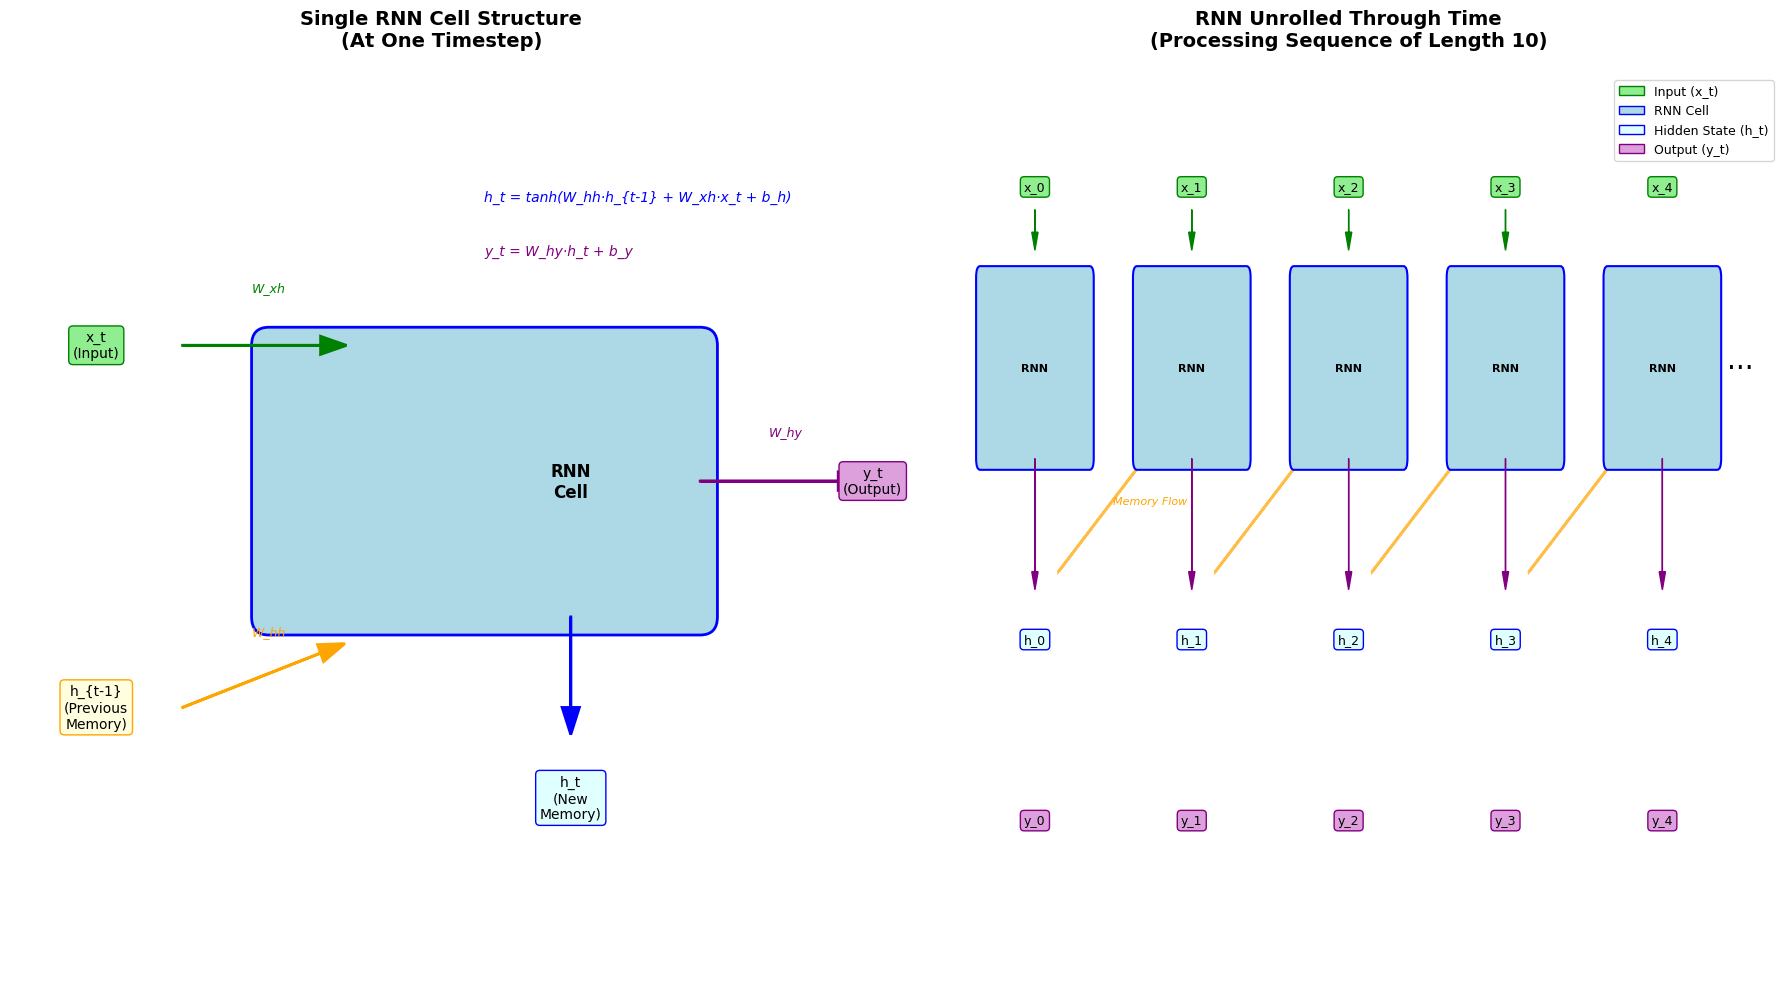


KEY INSIGHTS FROM THE VISUALIZATION:

1. SINGLE CELL (Left):
   - At each timestep, RNN takes: Input (x_t) + Previous Memory (h_{t-1})
   - Processes them through weights W_xh and W_hh
   - Produces: New Memory (h_t) + Output (y_t)

2. UNROLLED (Right):
   - Shows how RNN processes a sequence timestep by timestep
   - Memory (hidden state) flows horizontally from one timestep to next
   - Each hidden state contains information from ALL previous timesteps
   - Output at each timestep depends on current input AND all past inputs

3. MEMORY FLOW:
   - h_0 → h_1 → h_2 → ... → h_9
   - Each h_t carries information from timesteps 0, 1, 2, ..., t
   - This is how RNNs 'remember' past information!


In [12]:
# Visualization of Vanilla RNN Architecture
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle

# Create visualization of RNN structure
fig = plt.figure(figsize=(18, 10))

# Part 1: Single RNN Cell Structure (Left side)
ax1 = plt.subplot(1, 2, 1)
ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-0.5, 4.5)
ax1.axis('off')
ax1.set_title('Single RNN Cell Structure\n(At One Timestep)', fontsize=14, fontweight='bold', pad=20)

# RNN Cell box
cell_box = FancyBboxPatch((1, 1.5), 2.5, 1.5, boxstyle="round,pad=0.1", 
                          edgecolor='blue', facecolor='lightblue', linewidth=2)
ax1.add_patch(cell_box)
ax1.text(2.75, 2.25, 'RNN\nCell', ha='center', va='center', fontsize=12, fontweight='bold')

# Input x_t
ax1.text(0, 3, 'x_t\n(Input)', ha='center', va='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='green'))
ax1.arrow(0.5, 3, 0.8, 0, head_width=0.1, head_length=0.15, fc='green', ec='green', linewidth=2)
ax1.text(0.9, 3.3, 'W_xh', fontsize=9, style='italic', color='green')

# Previous hidden state h_{t-1}
ax1.text(0, 1, 'h_{t-1}\n(Previous\nMemory)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))
ax1.arrow(0.5, 1, 0.8, 0.3, head_width=0.1, head_length=0.15, fc='orange', ec='orange', linewidth=2)
ax1.text(0.9, 1.4, 'W_hh', fontsize=9, style='italic', color='orange')

# Output y_t
ax1.arrow(3.5, 2.25, 0.8, 0, head_width=0.1, head_length=0.15, fc='purple', ec='purple', linewidth=2)
ax1.text(3.9, 2.5, 'W_hy', fontsize=9, style='italic', color='purple')
ax1.text(4.5, 2.25, 'y_t\n(Output)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='plum', edgecolor='purple'))

# New hidden state h_t
ax1.arrow(2.75, 1.5, 0, -0.5, head_width=0.1, head_length=0.15, fc='blue', ec='blue', linewidth=2)
ax1.text(2.75, 0.5, 'h_t\n(New\nMemory)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightcyan', edgecolor='blue'))

# Equations
ax1.text(2.25, 3.8, 'h_t = tanh(W_hh·h_{t-1} + W_xh·x_t + b_h)', 
         fontsize=10, style='italic', color='blue')
ax1.text(2.25, 3.5, 'y_t = W_hy·h_t + b_y', 
         fontsize=10, style='italic', color='purple')

# Part 2: Unrolled RNN Through Time (Right side)
ax2 = plt.subplot(1, 2, 2)
ax2.set_xlim(-0.5, 10.5)
ax2.set_ylim(-0.5, 3.5)
ax2.axis('off')
ax2.set_title('RNN Unrolled Through Time\n(Processing Sequence of Length 10)', fontsize=14, fontweight='bold', pad=20)

# Show 5 timesteps for clarity
timesteps = [0, 1, 2, 3, 4]
x_positions = [1, 3, 5, 7, 9]

for i, (t, x_pos) in enumerate(zip(timesteps, x_positions)):
    # Input
    ax2.text(x_pos, 3, f'x_{t}', ha='center', va='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='green'))
    
    # RNN Cell
    cell = FancyBboxPatch((x_pos-0.7, 1.8), 1.4, 0.8, boxstyle="round,pad=0.05",
                          edgecolor='blue', facecolor='lightblue', linewidth=1.5)
    ax2.add_patch(cell)
    ax2.text(x_pos, 2.2, 'RNN', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Hidden state
    ax2.text(x_pos, 1, f'h_{t}', ha='center', va='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightcyan', edgecolor='blue'))
    
    # Output
    ax2.text(x_pos, 0.2, f'y_{t}', ha='center', va='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='plum', edgecolor='purple'))
    
    # Arrows from input to RNN
    if t < 4:
        ax2.arrow(x_pos, 2.9, 0, -0.1, head_width=0.08, head_length=0.08, fc='green', ec='green')
    
    # Arrows from RNN to output
    ax2.arrow(x_pos, 1.8, 0, -0.5, head_width=0.08, head_length=0.08, fc='purple', ec='purple')
    
    # Horizontal arrows showing memory flow
    if t < 4:
        # From h_t to next timestep's RNN
        ax2.arrow(x_pos+0.3, 1.3, 1.1, 0.5, head_width=0.08, head_length=0.15, 
                  fc='orange', ec='orange', linewidth=2, alpha=0.7)
        if t == 0:
            ax2.text(x_pos+1, 1.6, 'Memory Flow', fontsize=8, style='italic', color='orange')

# Add "..."
ax2.text(10, 2.2, '...', fontsize=20, ha='center')

# Add legend
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='lightgreen', edgecolor='green', label='Input (x_t)'),
    plt.Rectangle((0,0),1,1, facecolor='lightblue', edgecolor='blue', label='RNN Cell'),
    plt.Rectangle((0,0),1,1, facecolor='lightcyan', edgecolor='blue', label='Hidden State (h_t)'),
    plt.Rectangle((0,0),1,1, facecolor='plum', edgecolor='purple', label='Output (y_t)'),
]
ax2.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

# Additional text explanation
print("\n" + "="*70)
print("KEY INSIGHTS FROM THE VISUALIZATION:")
print("="*70)
print("\n1. SINGLE CELL (Left):")
print("   - At each timestep, RNN takes: Input (x_t) + Previous Memory (h_{t-1})")
print("   - Processes them through weights W_xh and W_hh")
print("   - Produces: New Memory (h_t) + Output (y_t)")
print("\n2. UNROLLED (Right):")
print("   - Shows how RNN processes a sequence timestep by timestep")
print("   - Memory (hidden state) flows horizontally from one timestep to next")
print("   - Each hidden state contains information from ALL previous timesteps")
print("   - Output at each timestep depends on current input AND all past inputs")
print("\n3. MEMORY FLOW:")
print("   - h_0 → h_1 → h_2 → ... → h_9")
print("   - Each h_t carries information from timesteps 0, 1, 2, ..., t")
print("   - This is how RNNs 'remember' past information!")
print("="*70)


In [15]:
# Initialize Weights and Biases for Vanilla RNN
# ============================================
# WHY INITIALIZATION MATTERS:
# ============================================
# 1. SYMMETRY BREAKING:
#    - If all weights start with same values, all neurons learn the same thing
#    - Random initialization ensures each neuron learns different features
#    - This diversity helps the network learn complex patterns
#
# 2. GRADIENT FLOW:
#    - Too small weights → vanishing gradients (gradients become too small)
#    - Too large weights → exploding gradients (gradients become too large)
#    - Proper initialization keeps gradients in a healthy range
#
# 3. TRAINING STABILITY:
#    - Good initialization → faster convergence, stable training
#    - Bad initialization → slow learning, unstable training, or no learning at all
#
# INITIALIZATION STRATEGIES:
# ============================================
# For WEIGHTS (matrices):
# - Small random values around zero work best for RNNs
# - Common approaches:
#   1. Normal distribution: W ~ N(0, std²) where std = 0.01 or 1/sqrt(hidden_size)
#   2. Uniform distribution: W ~ U(-0.1, 0.1) or U(-1/sqrt(hidden_size), 1/sqrt(hidden_size))
# - RNNs are sensitive, so we use SMALLER values than feedforward networks
#
# For BIASES (vectors):
# - Usually initialized to ZERO
# - Sometimes small positive values for hidden bias can help (e.g., 0.1)
# - Output bias can also be set to mean of target values (if known)
#
# We'll use: Normal distribution with std = 0.01 for weights, zeros for biases
# ============================================

# Define RNN architecture parameters
input_size = 2      # Number of input features (RPM, Vehicle Speed)
hidden_size = 32    # Number of hidden units (we'll start with 32)
output_size = 2     # Number of output features (predicting RPM and Speed)

print("RNN Architecture:")
print("="*50)
print(f"Input size (input_size):  {input_size}  → (RPM, Vehicle Speed)")
print(f"Hidden size (hidden_size): {hidden_size} → (number of memory units)")
print(f"Output size (output_size): {output_size} → (predicted RPM, Speed)")

# Initialize WEIGHTS using small random values (Normal distribution)
# ============================================
# W_hh: Hidden-to-hidden weights (maintains memory)
#       Shape: (hidden_size, hidden_size)
#       Purpose: Combines previous hidden state h_{t-1} with current computation
W_hh = np.random.normal(0, 0.01, (hidden_size, hidden_size))

# W_xh: Input-to-hidden weights (processes current input)
#       Shape: (input_size, hidden_size)
#       Purpose: Transforms current input x_t to hidden space
W_xh = np.random.normal(0, 0.01, (input_size, hidden_size))

# W_hy: Hidden-to-output weights (produces predictions)
#       Shape: (hidden_size, output_size)
#       Purpose: Transforms hidden state h_t to output y_t
W_hy = np.random.normal(0, 0.01, (hidden_size, output_size))

print("\n" + "="*50)
print("Weight Matrices Initialized:")
print(f"W_hh shape: {W_hh.shape}  → Connects hidden state to hidden state")
print(f"W_xh shape: {W_xh.shape}  → Connects input to hidden state")
print(f"W_hy shape: {W_hy.shape}  → Connects hidden state to output")

# WHY CALCULATE WEIGHT STATISTICS?
# Weight statistics (mean, std, min, max) help us verify that initialization worked correctly.
# They act as a sanity check: we can confirm values are small (std ~0.01), centered around zero
# (mean ~0), and have no extreme outliers. This helps catch initialization bugs early and gives
# us confidence that training will start from a good initial state. For learning purposes, it also
# helps us see what initialization actually produces in practice.
print("\nWeight Statistics:")
print(f"W_hh - Mean: {W_hh.mean():.6f}, Std: {W_hh.std():.6f}, Min: {W_hh.min():.6f}, Max: {W_hh.max():.6f}")
print(f"W_xh - Mean: {W_xh.mean():.6f}, Std: {W_xh.std():.6f}, Min: {W_xh.min():.6f}, Max: {W_xh.max():.6f}")
print(f"W_hy - Mean: {W_hy.mean():.6f}, Std: {W_hy.std():.6f}, Min: {W_hy.min():.6f}, Max: {W_hy.max():.6f}")

# Initialize BIASES using zeros
# ============================================
# b_h: Hidden state bias
#      Shape: (hidden_size,)
#      Purpose: Adds constant offset to hidden state computation
b_h = np.zeros((hidden_size,))

# b_y: Output bias
#      Shape: (output_size,)
#      Purpose: Adds constant offset to output computation
b_y = np.zeros((output_size,))

print("\n" + "="*50)
print("Bias Vectors Initialized:")
print(f"b_h shape: {b_h.shape}  → Hidden state bias")
print(f"b_y shape: {b_y.shape}  → Output bias")

print("\nBias Statistics:")
print(f"b_h - Mean: {b_h.mean():.6f}, Values: {b_h[:5]}... (all zeros)")
print(f"b_y - Mean: {b_y.mean():.6f}, Values: {b_y}")

# Visualize why initialization matters
print("\n" + "="*50)
print("DEMONSTRATION: Why Initialization Matters")
print("="*50)

# Show example of what happens with different initializations
print("\n1. Our initialization (std=0.01):")
print(f"   - Weights are small: ~{W_hh.std():.4f}")
print(f"   - Will allow gradients to flow properly")
print(f"   - Each neuron starts with slightly different values (breaks symmetry)")

# Example of bad initialization - too large
W_bad = np.random.normal(0, 1.0, (hidden_size, hidden_size))
print(f"\n2. Bad initialization (std=1.0, too large):")
print(f"   - Weights are large: ~{W_bad.std():.4f}")
print(f"   - Could cause exploding gradients (values become too large)")
print(f"   - Training becomes unstable")

# Example of bad initialization - too small
W_bad2 = np.random.normal(0, 0.0001, (hidden_size, hidden_size))
print(f"\n3. Bad initialization (std=0.0001, too small):")
print(f"   - Weights are tiny: ~{W_bad2.std():.6f}")
print(f"   - Could cause vanishing gradients (values become too small)")
print(f"   - Network might not learn (or learns very slowly)")

print("\n" + "="*50)
print("✓ Initialization Complete!")
print("="*50)
print("\nWe now have:")
print("  - Weight matrices: W_hh, W_xh, W_hy")
print("  - Bias vectors: b_h, b_y")
print("  - All ready for forward pass implementation!")


RNN Architecture:
Input size (input_size):  2  → (RPM, Vehicle Speed)
Hidden size (hidden_size): 32 → (number of memory units)
Output size (output_size): 2 → (predicted RPM, Speed)

Weight Matrices Initialized:
W_hh shape: (32, 32)  → Connects hidden state to hidden state
W_xh shape: (2, 32)  → Connects input to hidden state
W_hy shape: (32, 2)  → Connects hidden state to output

Weight Statistics:
W_hh - Mean: 0.000377, Std: 0.009730, Min: -0.032322, Max: 0.033851
W_xh - Mean: 0.000413, Std: 0.009739, Min: -0.031243, Max: 0.022636
W_hy - Mean: 0.000773, Std: 0.010255, Min: -0.032410, Max: 0.019368

Bias Vectors Initialized:
b_h shape: (32,)  → Hidden state bias
b_y shape: (2,)  → Output bias

Bias Statistics:
b_h - Mean: 0.000000, Values: [0. 0. 0. 0. 0.]... (all zeros)
b_y - Mean: 0.000000, Values: [0. 0.]

DEMONSTRATION: Why Initialization Matters

1. Our initialization (std=0.01):
   - Weights are small: ~0.0097
   - Will allow gradients to flow properly
   - Each neuron starts wit

# Understanding Hidden Size

## What is Hidden Size?

**Hidden size** is the **dimension (size) of the hidden state vector** `h_t`. Think of it as the number of "memory slots" the RNN has to store information.

- `h_t` is a vector of size `hidden_size`
- Each dimension can learn to capture different patterns or features
- More dimensions = more capacity to remember different things simultaneously

### Analogy
Think of hidden size like a filing cabinet:
- **Hidden size = 32** → 32 drawers (each can store different information)
- **Hidden size = 64** → 64 drawers (more capacity, but takes more space)
- **Hidden size = 16** → 16 drawers (less capacity, but faster and simpler)

## What Does Each Dimension Represent?

Each dimension in the hidden state learns to capture different patterns during training:
- **Dimension 1** might learn: "Is RPM currently increasing?"
- **Dimension 2** might learn: "Is Speed above average?"
- **Dimension 3** might learn: "What's the correlation between RPM and Speed?"
- **Dimension 4** might learn: "What's the rate of change in RPM?"
- ... and so on

The model automatically learns what each dimension should represent based on the data.

## How Hidden Size Affects the Model

### Larger Hidden Size (e.g., 64, 128, 256)
**Pros:**
- ✅ More capacity to learn complex patterns
- ✅ Can remember more information
- ✅ Better for complex tasks

**Cons:**
- ❌ More parameters (more weights to train)
- ❌ Slower training
- ❌ More memory needed
- ❌ Risk of overfitting if too large

### Smaller Hidden Size (e.g., 8, 16, 32)
**Pros:**
- ✅ Fewer parameters (faster training)
- ✅ Less memory needed
- ✅ Simpler model (easier to understand/debug)
- ✅ Less risk of overfitting

**Cons:**
- ❌ Less capacity (might miss complex patterns)
- ❌ Might not learn all patterns in the data
- ❌ Risk of underfitting if too small

## Why We Chose Hidden Size = 32?

We chose **32** as a good starting point because:
1. **Balance**: Good balance between capacity and complexity
2. **Learning**: Not too large to understand, not too small to be ineffective
3. **Standard**: Common choice for many problems (works well)
4. **Manageable**: Easy to work with and debug

**We can always experiment!** Common values:
- **Small**: 16, 32, 64
- **Medium**: 128, 256
- **Large**: 512, 1024 (for very complex problems)

For learning vanilla RNNs and this dataset (2 features), **32 is perfect**.

## How Hidden Size Appears in Our Model

Hidden size affects the shapes of all our weight matrices:
- **W_hh**: (hidden_size, hidden_size) = (32, 32)
- **W_xh**: (input_size, hidden_size) = (2, 32)
- **W_hy**: (hidden_size, output_size) = (32, 2)
- **h_t**: (hidden_size,) = (32,)
- **b_h**: (hidden_size,) = (32,)

The **32** appears everywhere because it's the size of our memory vector!

## Key Takeaway

**Hidden size = 32** means:
- The RNN has a **32-dimensional memory vector**
- Each dimension learns to capture different patterns
- It's a hyperparameter (we choose it, model learns how to use it)
- It balances between capacity and complexity
